In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npy

df = pd.read_csv('../Projektdatensaetze/2023/Fahrradzaehlstellen2023_stuendlich_RENAMED.csv',
                 sep=';')
df_qh= pd.read_csv('../Projektdatensaetze/2023/Fahrradzaehlstellen2023_15minutenauswertung_0.csv',
                 sep=';', skiprows=2)
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')
df['days'] = df['time'].dt.date

display(df_qh)
df_qh['Time'] = pd.to_datetime(df_qh['Time'], format='%d.%m.%Y %H:%M')
df_qh['days'] = df_qh['Time'].dt.date


,Time,5.01 BN - Kennedybrücke (Nordseite),5.02 BN - Kennedybrücke (Südseite) Barometer,5.03 BN - Nordbrücke (Südseite),5.04 BN - Nordbrücke (Nordseite),5.05 BN - Südbrücke (Südseite),5.06 BN - Südbrücke (Nordseite),5.07 BN - Estermannufer,5.08 BN - Von-Sandt-Ufer,5.09 BN - Rhenusallee,5.10 BN - Bröhltalweg,5.11 BN - Brühler Straße,5.13 BN - Wilhelm-Spiritus-Ufer,5.14 BN - Mc Cloy Weg,5.15 BN - Weg auf Damm Neil,Kennedybrücke,Nordbrücke,Südbrücke
0,01.01.2023 00:00,5.0,1.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,5.0
1,01.01.2023 00:15,2.0,6.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,1.0,6.0
2,01.01.2023 00:30,12.0,5.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,17.0,1.0,4.0
3,01.01.2023 00:45,7.0,13.0,1.0,0.0,1.0,6.0,0.0,1.0,0.0,1.0,3.0,4.0,0.0,3.0,20.0,1.0,7.0
4,01.01.2023 01:00,5.0,13.0,6.0,2.0,6.0,2.0,0.0,1.0,0.0,4.0,5.0,10.0,1.0,4.0,18.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31.12.2023 22:45,5.0,8.0,0.0,0.0,7.0,1.0,0.0,0.0,NaN,2.0,NaN,4.0,0.0,0.0,13.0,0.0,8.0
35036,31.12.2023 23:00,4.0,14.0,2.0,1.0,2.0,3.0,0.0,0.0,NaN,0.0,NaN,5.0,0.0,0.0,18.0,3.0,5.0
35037,31.12.2023 23:15,5.0,8.0,0.0,0.0,1.0,0.0,0.0,2.0,NaN,0.0,NaN,3.0,0.0,1.0,13.0,0.0,1.0
35038,31.12.2023 23:30,6.0,6.0,6.0,2.0,1.0,1.0,0.0,2.0,NaN,5.0,NaN,3.0,0.0,5.0,12.0,8.0,2.0


In [2]:
import matplotlib.gridspec as gridspec

def plot(header, hourly):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 
              'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'lime', 'gold', 'violet', 'blue']
    
    all_dates = pd.date_range(start=df['days'].min(), end=df['days'].max())
    
    if header != 'time' and header != 'days' and header != 'Time':
        fig = plt.figure(figsize=(8, 6))
        gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])  # 2 Zeilen, Plot 3/4 und Tabelle 1/4

        ax = plt.subplot(gs[0])  # Plot in der oberen Zeile
        
        # Plot der Daten
        x_values_per_day = df.groupby('days')[header].sum()
        x_values_per_day = x_values_per_day.reindex(all_dates, fill_value=None)
        ax.plot(x_values_per_day, color=colors[df.columns.get_loc(header)], label='Anzahl')

        # Zellen für die Tabelle
        x_values_per_hour = df[header]
        cells_per_hour = [x_values_per_hour.mean(), x_values_per_hour.median(),
                          x_values_per_hour.std(), x_values_per_hour.min(), x_values_per_hour.max()]

        cells_per_day = [x_values_per_day.mean(), x_values_per_day.median(), 
                         x_values_per_day.std(), x_values_per_day.min(), x_values_per_day.max()]

        # Runde die Werte für die Tabelle
        cells_per_hour = [round(value, 2) for value in cells_per_hour]
        cells_per_day = [round(value, 2) for value in cells_per_day]

        # Tabellenüberschriften
        titles = ['Mittelwert', 'Median', 'Standardabw.', 'Min', 'Max']

        # Tabelle in der unteren Zeile
        ax_table = plt.subplot(gs[1])  # Leere Achse, um die Tabelle zu setzen
        ax_table.axis('off')  # Achsen ausschalten, da nur die Tabelle angezeigt wird

        # Tabelle erstellen
        table = ax_table.table(cellText=[cells_per_hour, cells_per_day], rowLabels=['pro {}'.format(hourly), 'pro Tag'],
                               colLabels=titles, loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)

        # Achsentitel und Legende für den Plot
        ax.set_title(header)
        ax.set_xlabel('Tag')
        ax.set_ylabel('Überquerungen mit dem Fahrrad')
        ax.legend()

        # Plot anzeigen
        plt.tight_layout()
        plt.show()


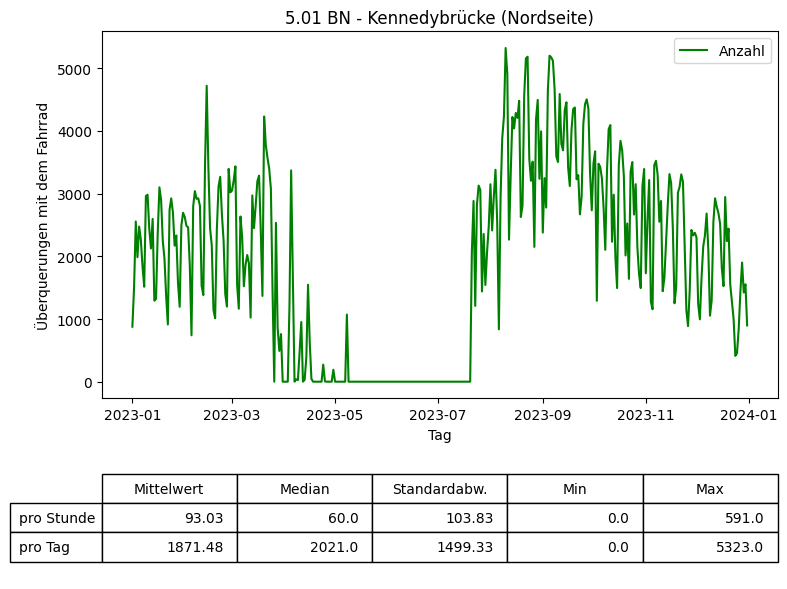

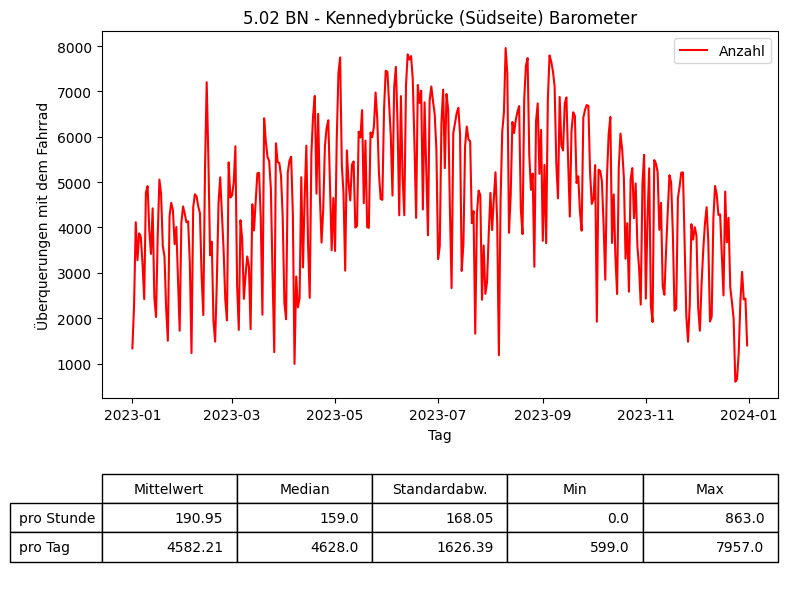

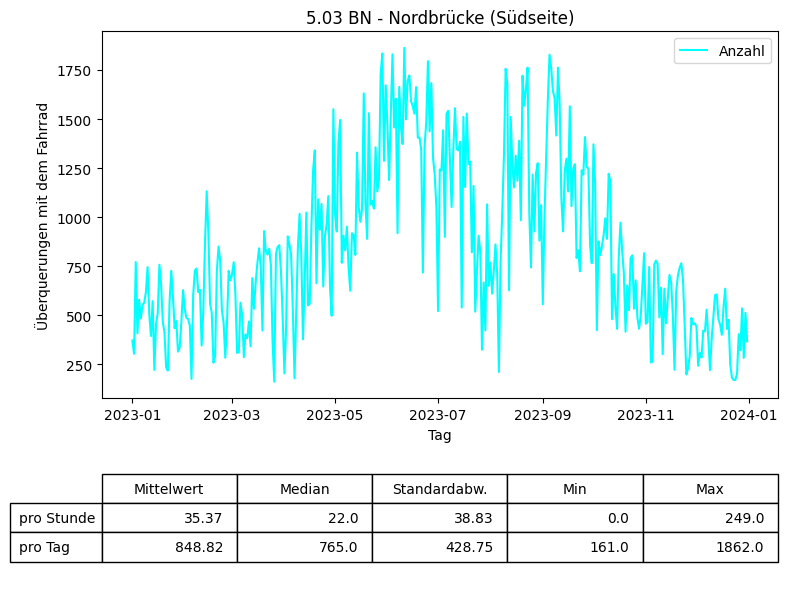

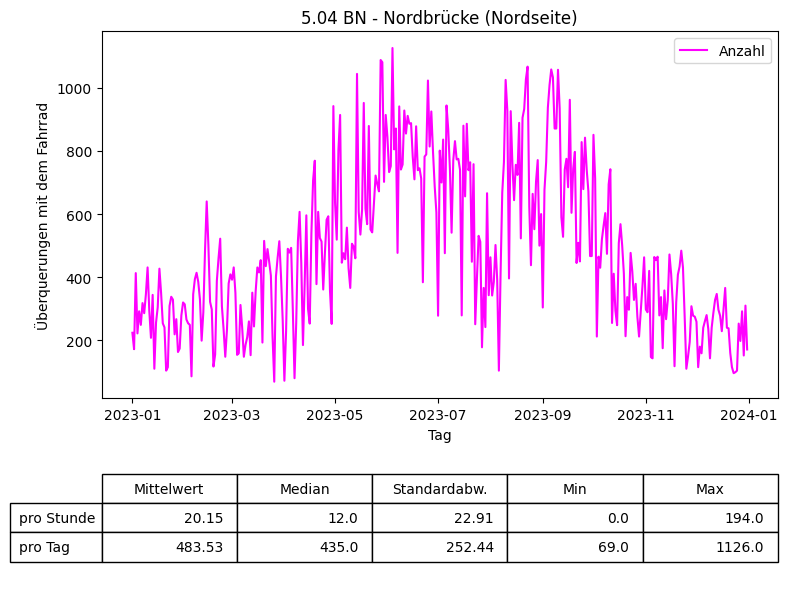

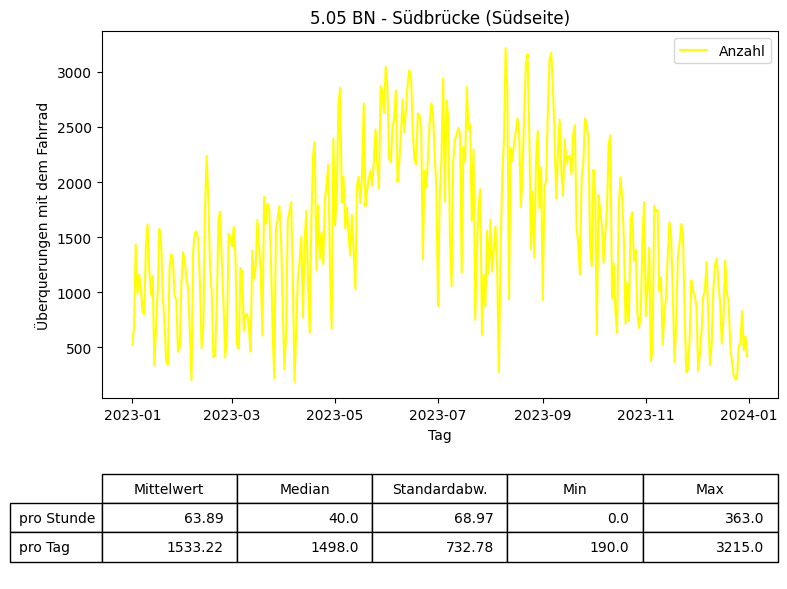

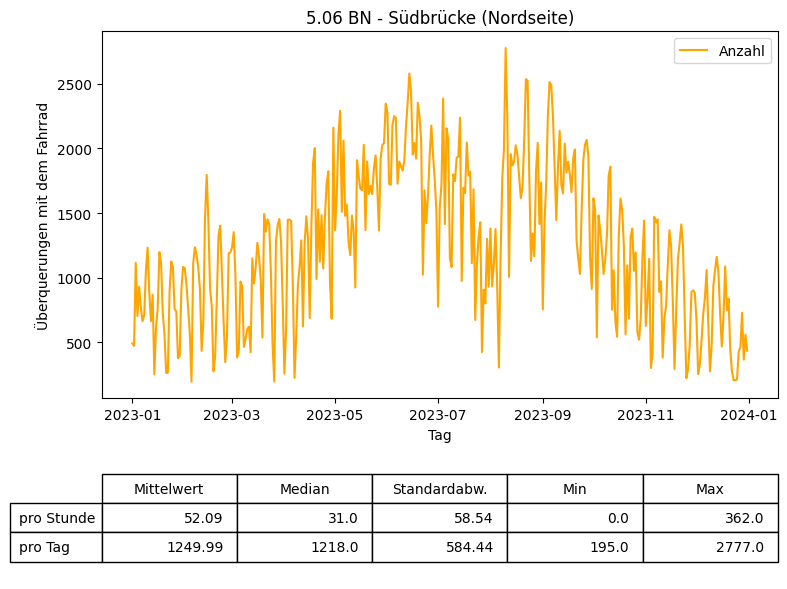

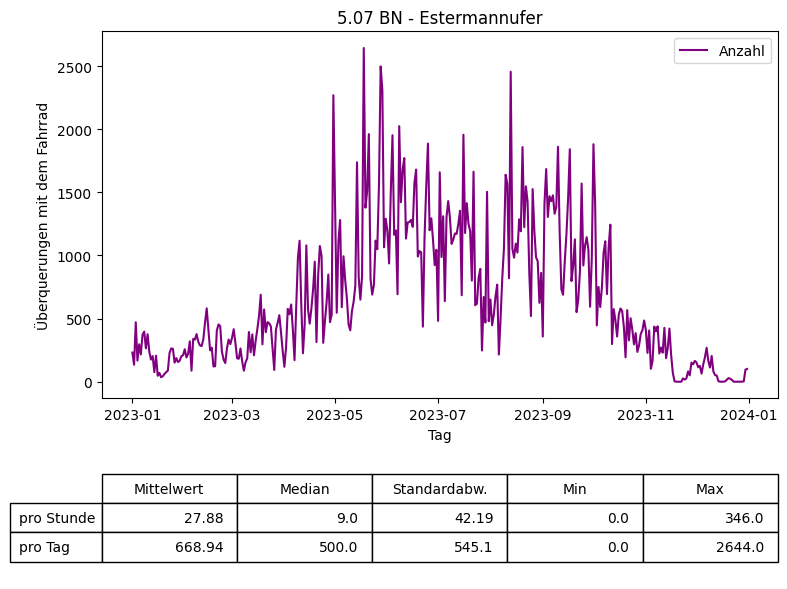

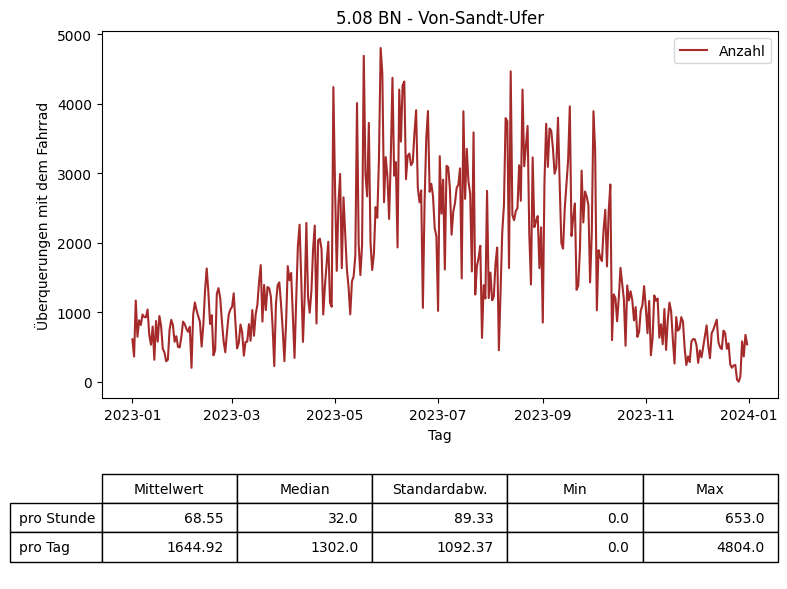

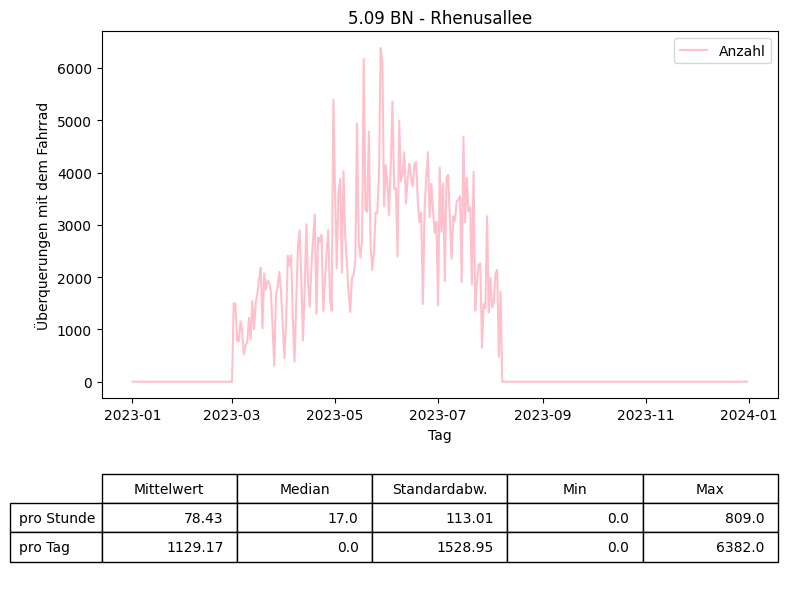

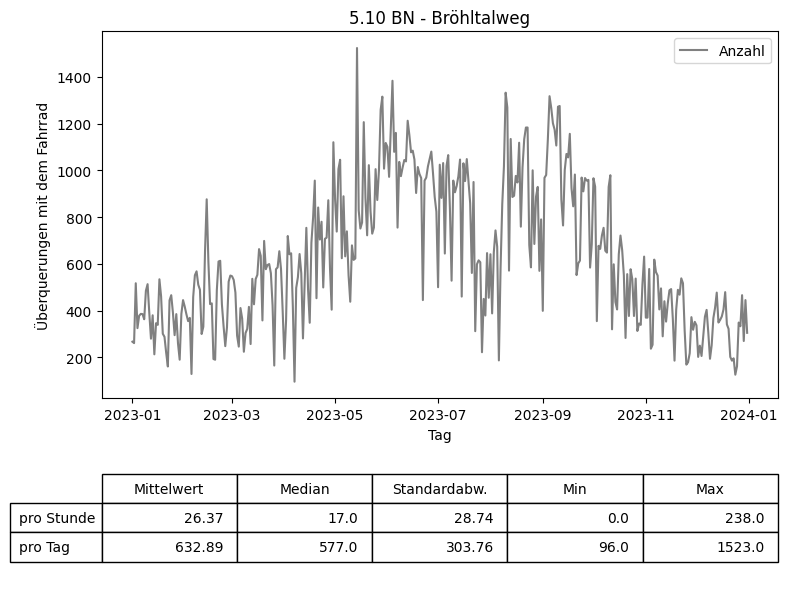

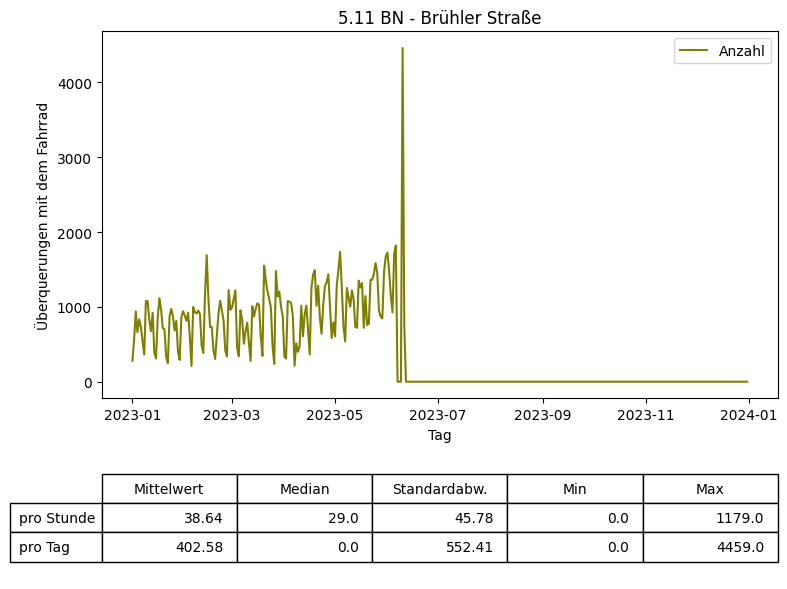

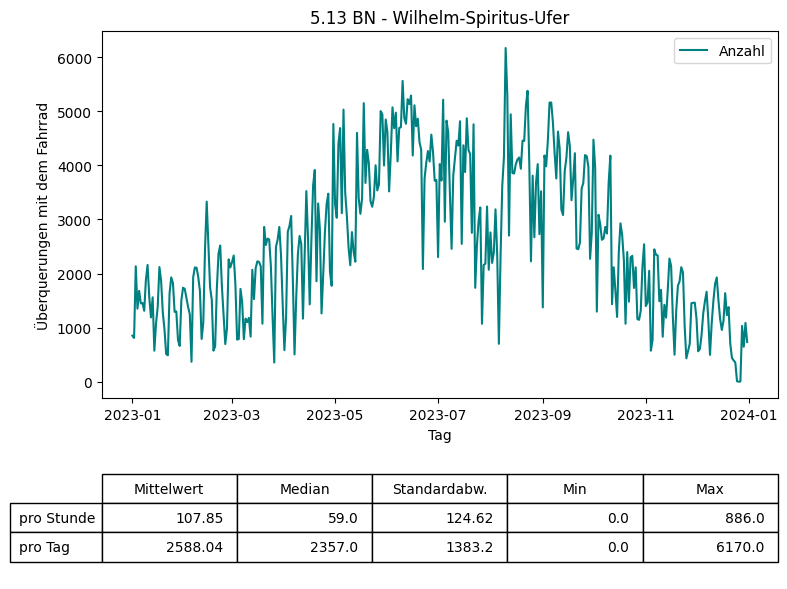

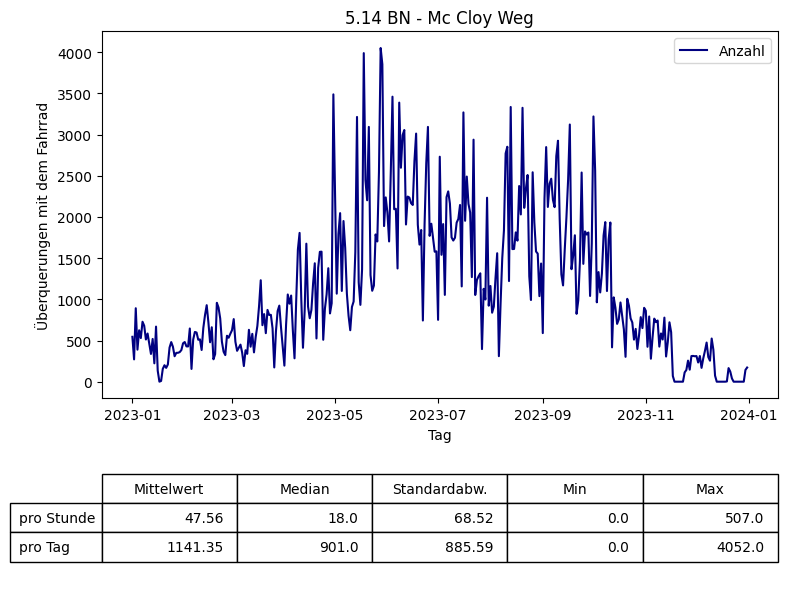

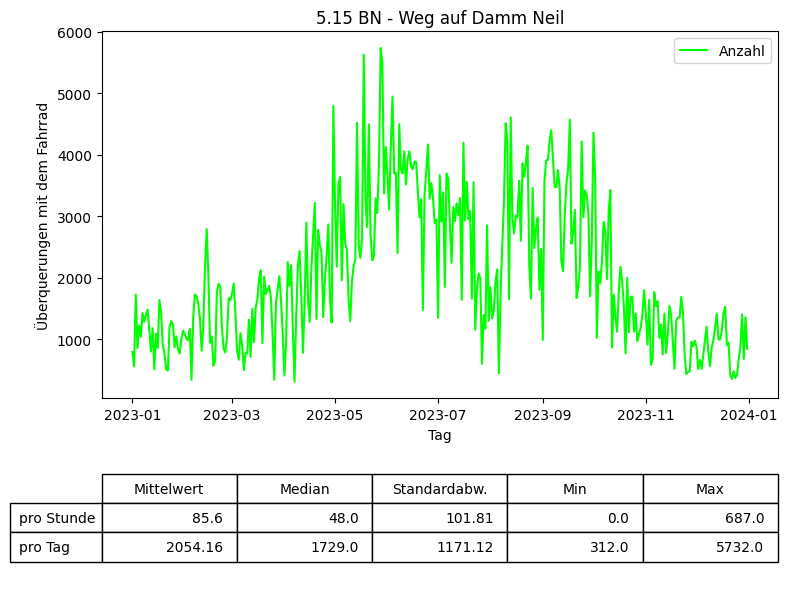

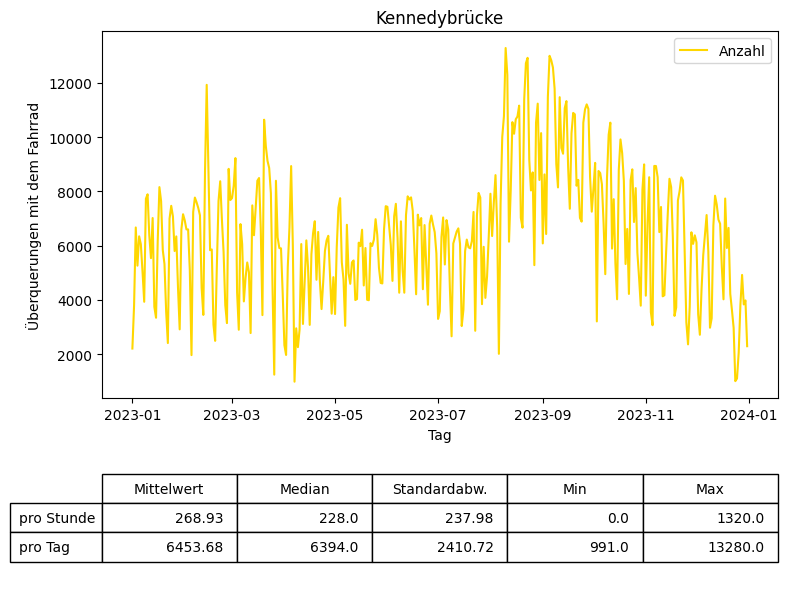

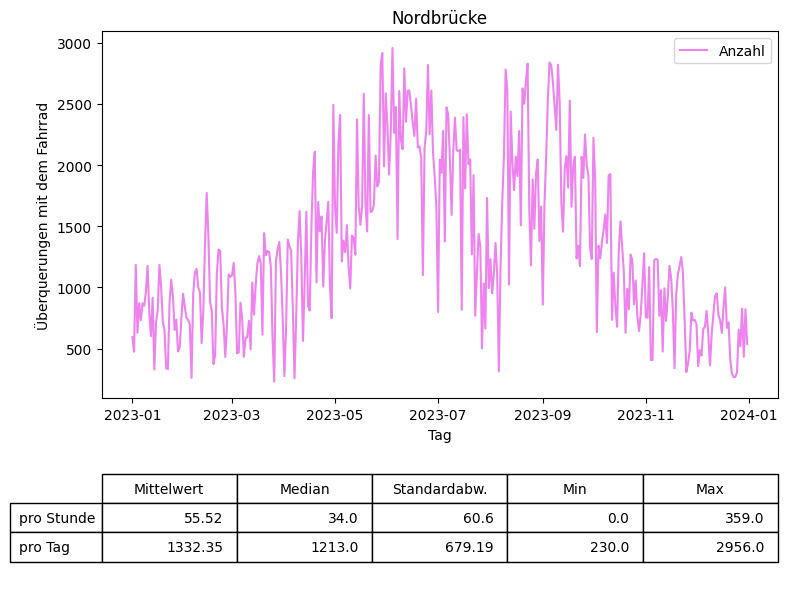

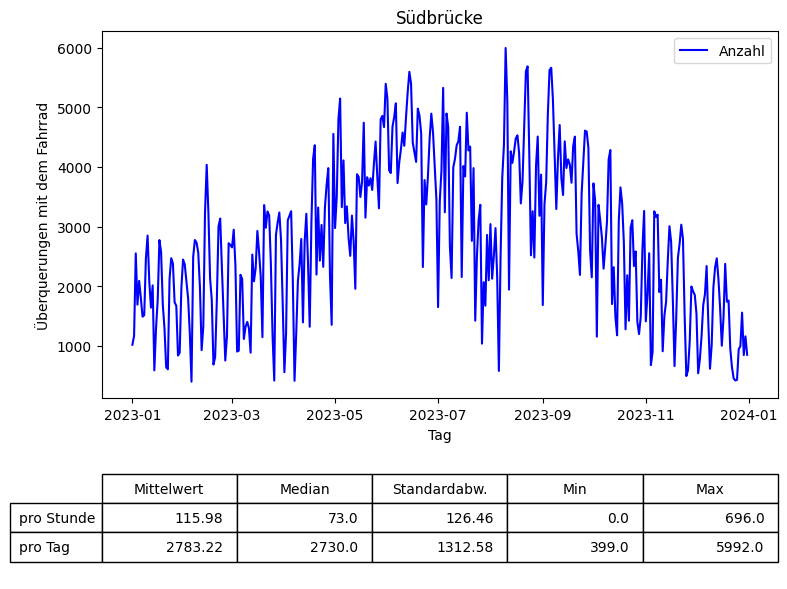

In [3]:
#fasse jeden Tag zusammen, stündliche Datensätze
for name in df.columns:
   plot(name, 'Stunde')

In [4]:
import matplotlib.gridspec as gridspec

def plot_tables(columns, hourly):

    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 
                  'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'lime', 'gold', 'violet', 'blue']
    
    all_dates = pd.date_range(start=df['days'].min(), end=df['days'].max())
    all_rows = []
    rows_labels = []
    fig, ax = plt.subplots()
    
    for name in columns:
        if name != 'time' and name != 'days' and name !='Time':
            x_values_per_day = df.groupby('days')[name].sum()
            x_values_per_day = x_values_per_day.reindex(all_dates, fill_value=None)
            # Zellen für die Tabelle
            x_values_per_hour = df[name]
            cells_per_hour = [x_values_per_hour.mean(), x_values_per_hour.median(),
                              x_values_per_hour.std(), x_values_per_hour.min(), x_values_per_hour.max()]
    
            cells_per_day = [x_values_per_day.mean(), x_values_per_day.median(), 
                             x_values_per_day.std(), x_values_per_day.min(), x_values_per_day.max()]
    
            # Runde die Werte für die Tabelle
            cells_per_hour = [round(value, 2) for value in cells_per_hour]
            cells_per_day = [round(value, 2) for value in cells_per_day]
            all_rows.append(cells_per_hour)
            all_rows.append(cells_per_day)
    
            rows_labels.append('{} pro {}'.format(name, hourly))
            rows_labels.append('{} pro Tag'.format(name))
    
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    # Tabellenüberschriften
    titles = ['Mittelwert', 'Median', 'Standardabw.', 'Min', 'Max']
    # Tabelle erstellen
    table =ax.table(cellText=all_rows, rowLabels=rows_labels, colLabels = titles,
                               loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)


In [5]:
values = df.isnull().any()
values

time                                            False
5.01 BN - Kennedybrücke (Nordseite)              True
5.02 BN - Kennedybrücke (Südseite) Barometer     True
5.03 BN - Nordbrücke (Südseite)                  True
5.04 BN - Nordbrücke (Nordseite)                 True
5.05 BN - Südbrücke (Südseite)                   True
5.06 BN - Südbrücke (Nordseite)                  True
5.07 BN - Estermannufer                          True
5.08 BN - Von-Sandt-Ufer                         True
5.09 BN - Rhenusallee                            True
5.10 BN - Bröhltalweg                            True
5.11 BN - Brühler Straße                         True
5.13 BN - Wilhelm-Spiritus-Ufer                  True
5.14 BN - Mc Cloy Weg                            True
5.15 BN - Weg auf Damm Neil                      True
Kennedybrücke                                    True
Nordbrücke                                       True
Südbrücke                                        True
days                        

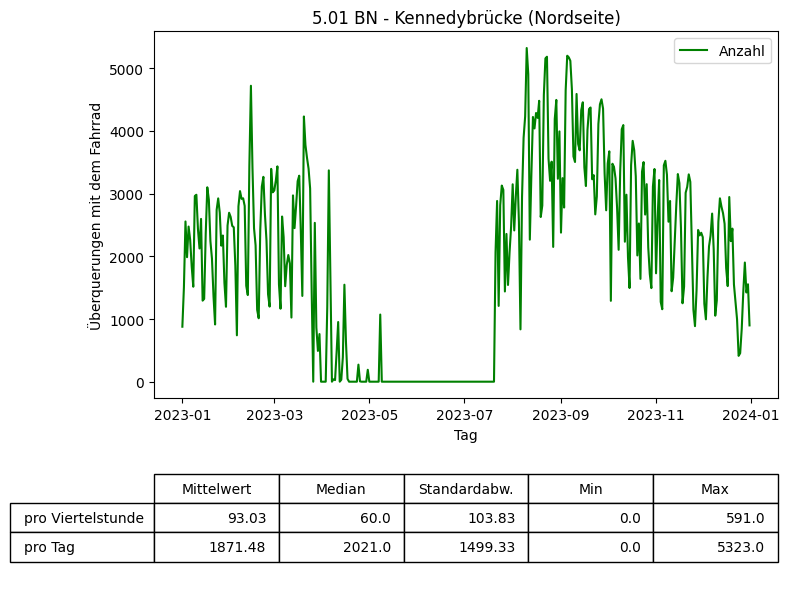

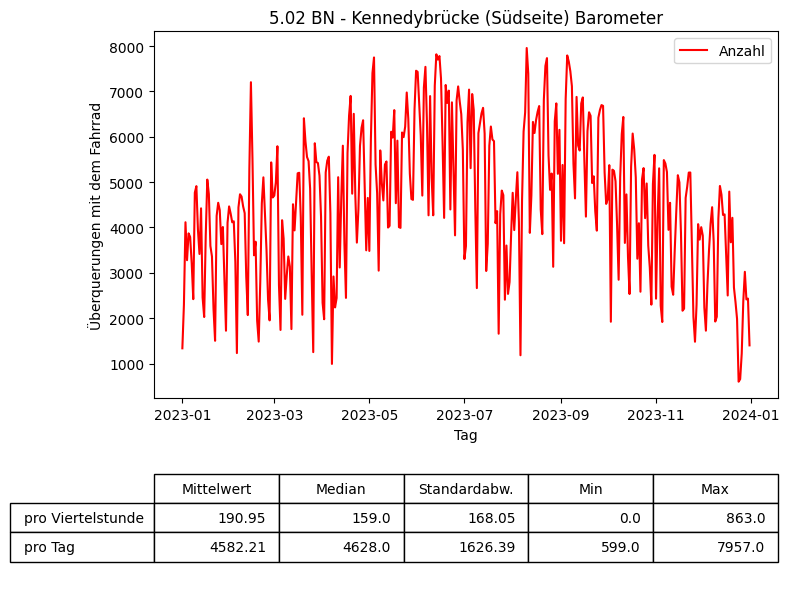

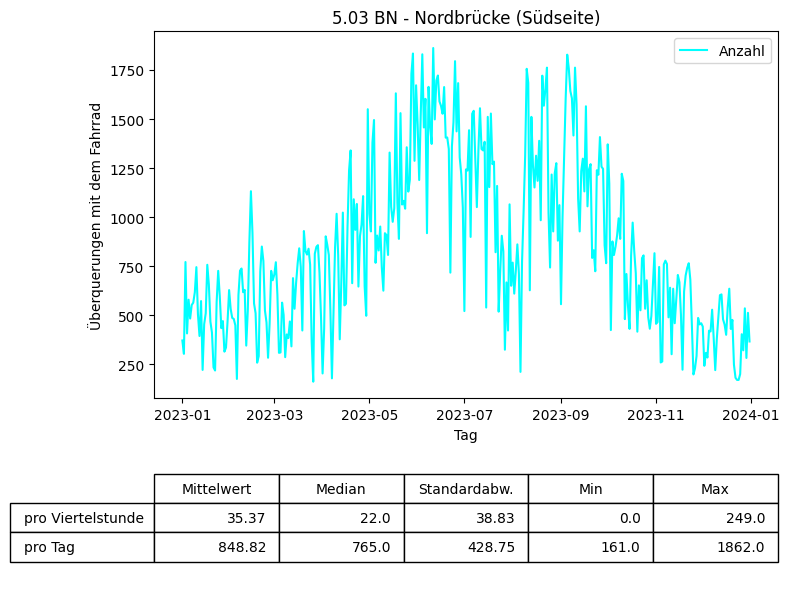

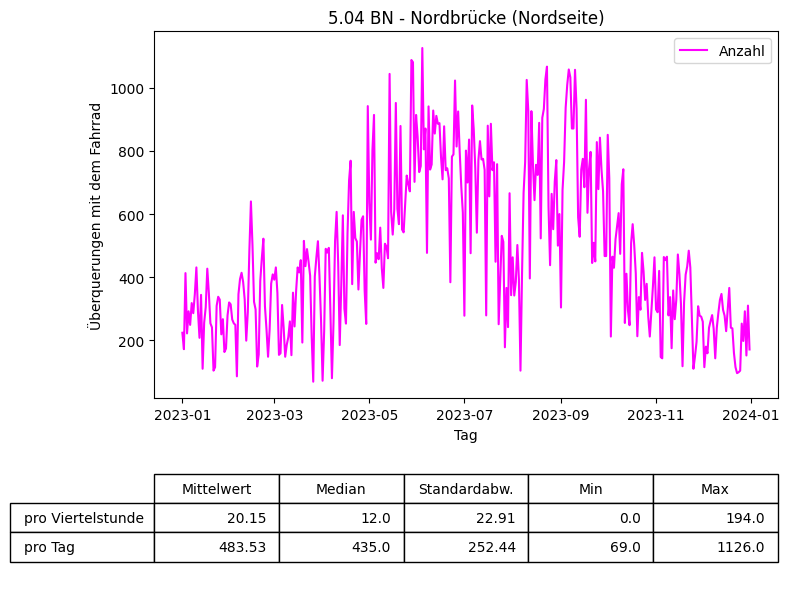

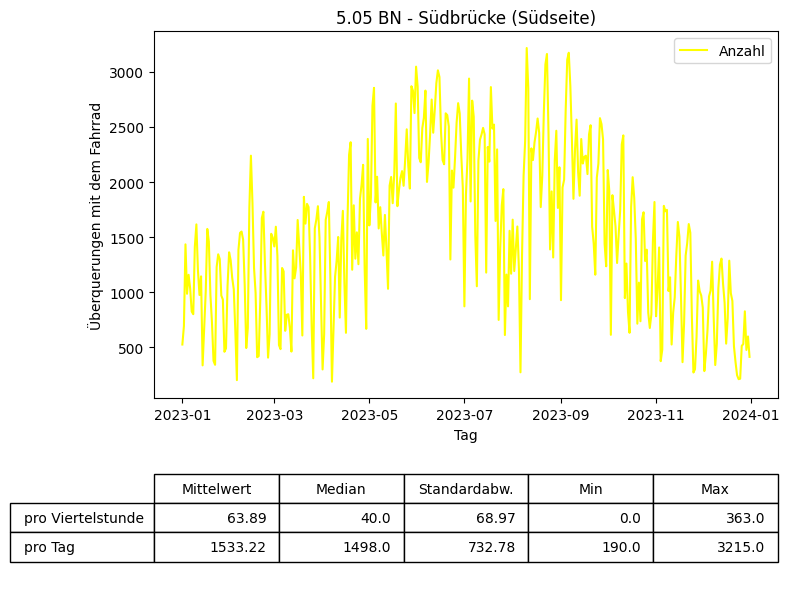

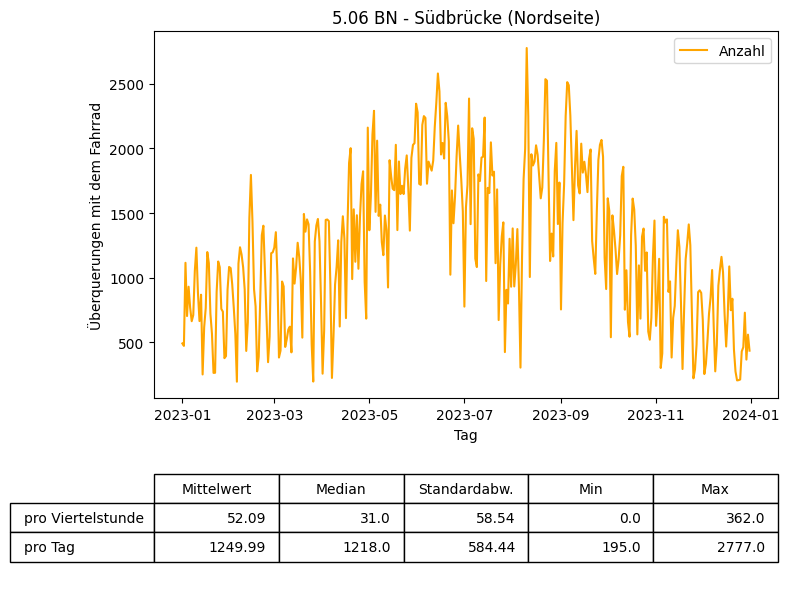

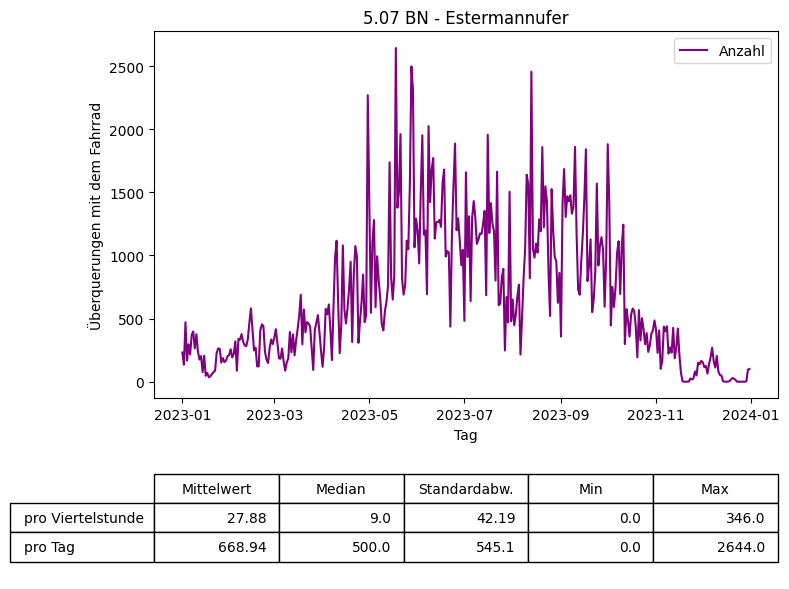

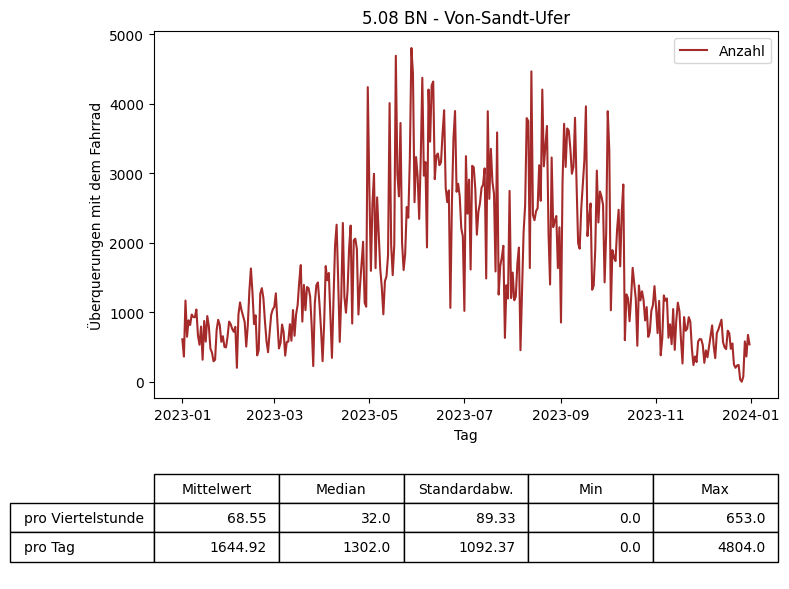

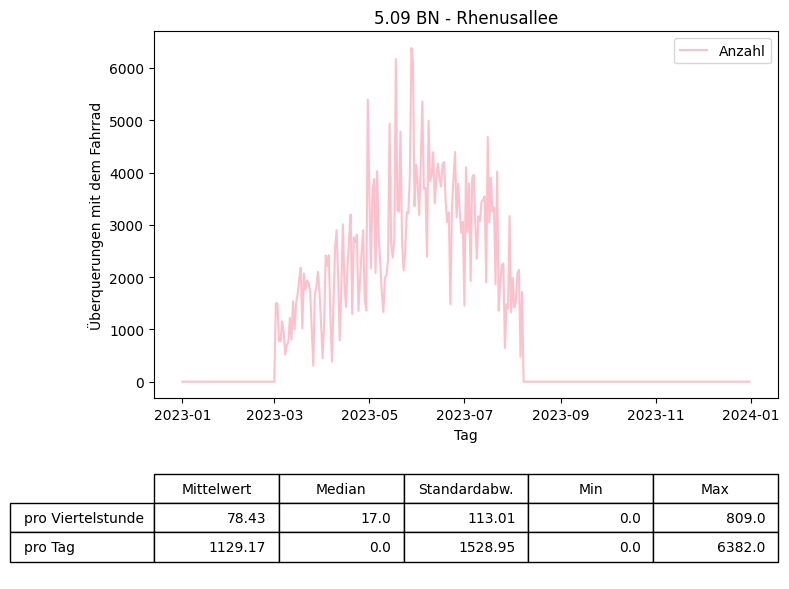

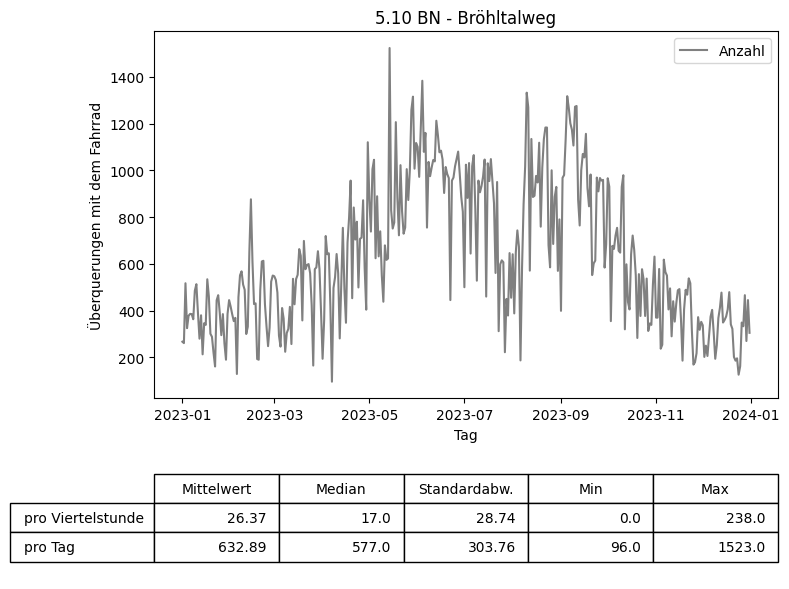

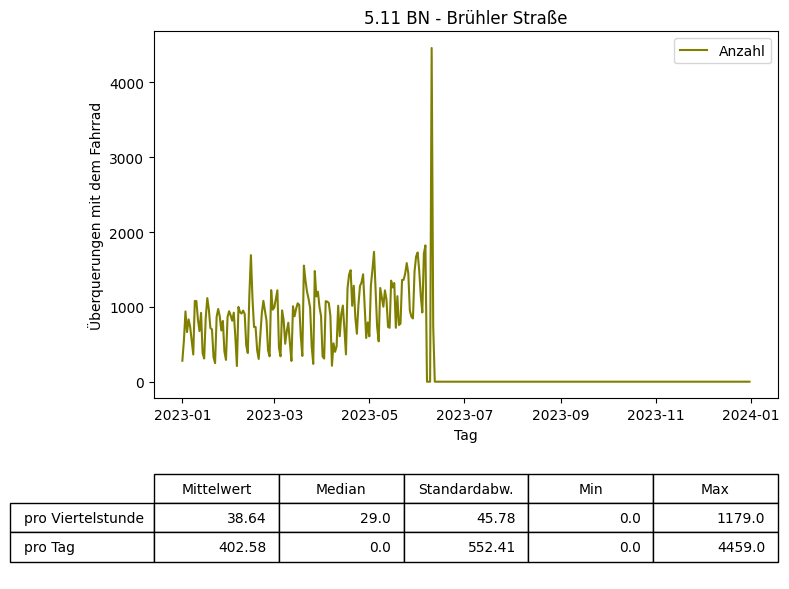

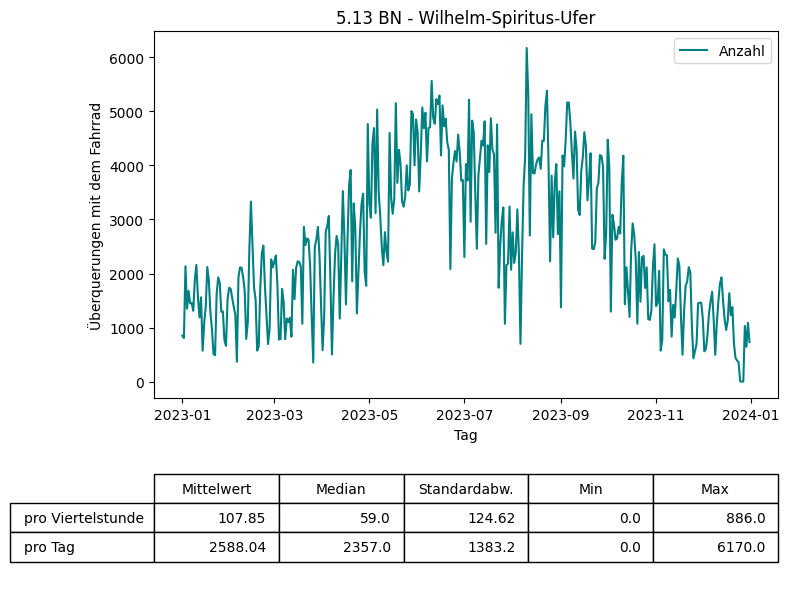

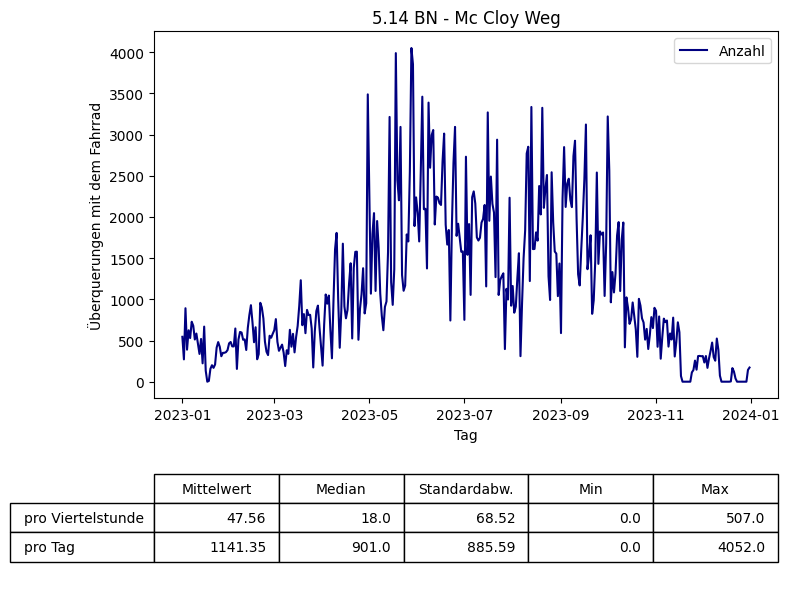

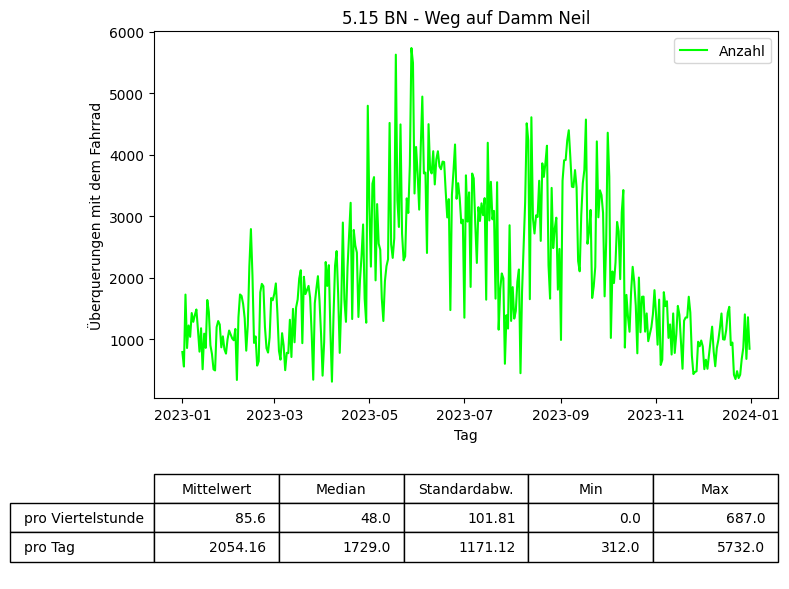

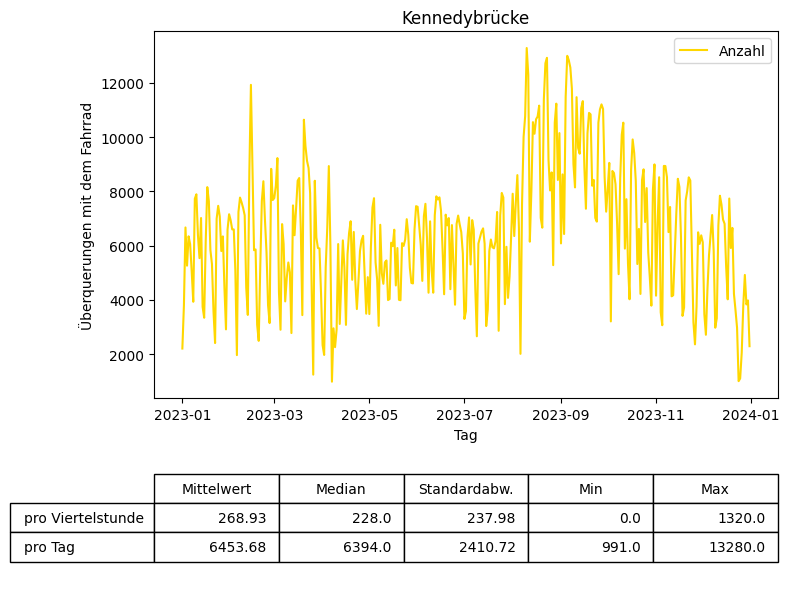

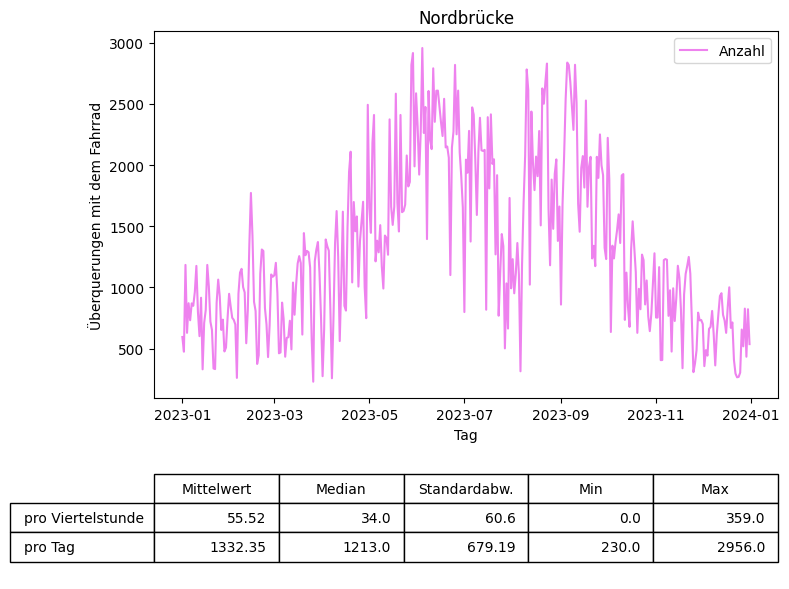

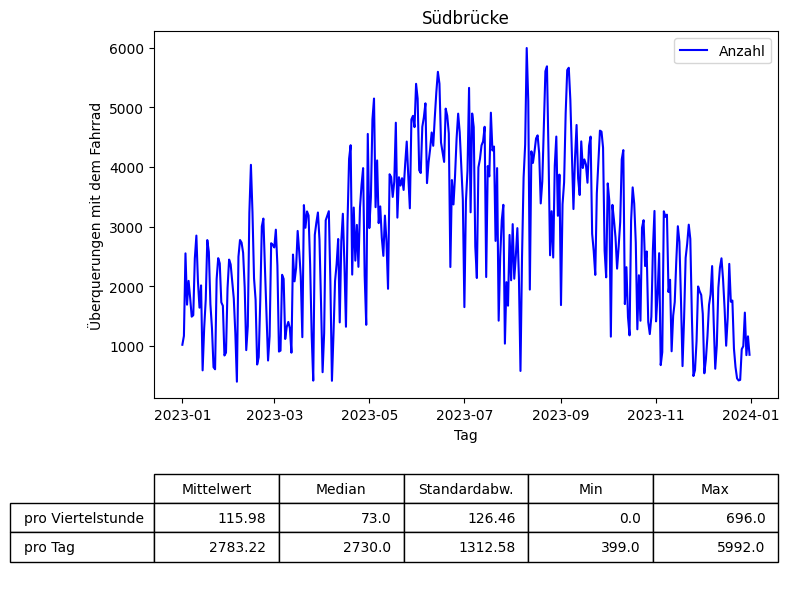

In [6]:
#plotte viertelstündliche Daten
for name in df_qh.columns:
    plot(name, 'Viertelstunde')

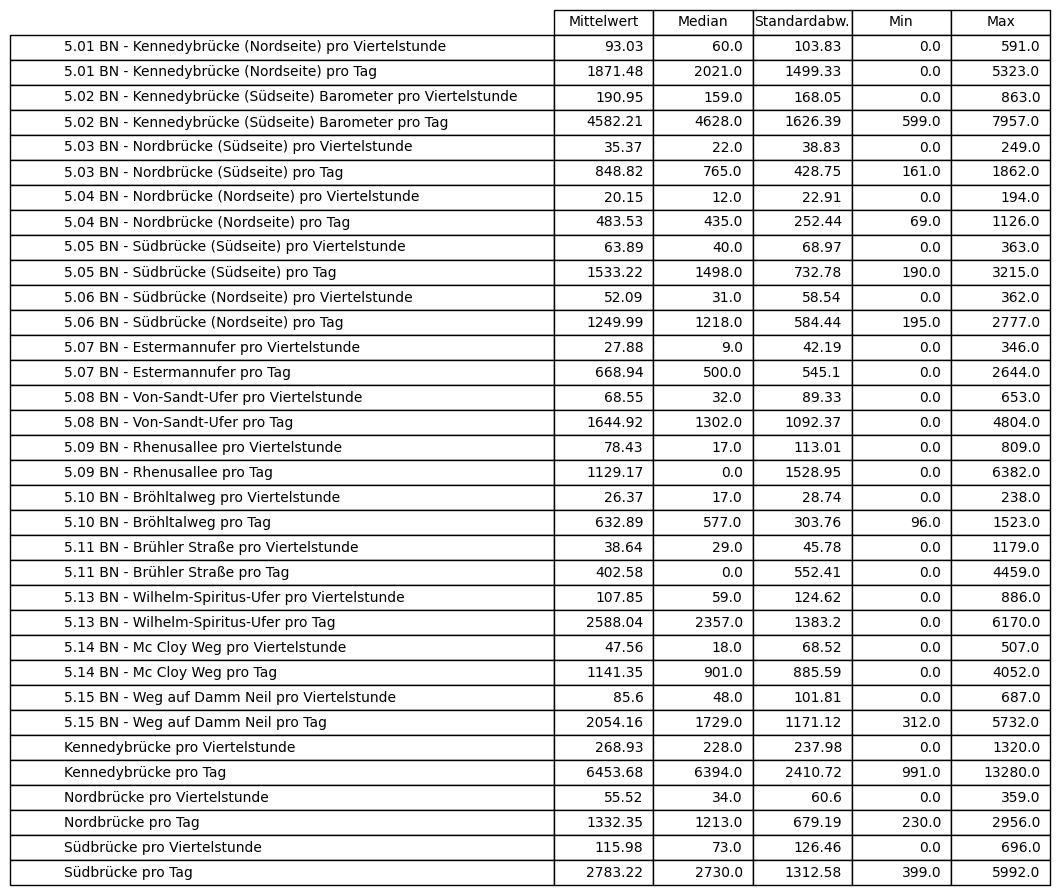

In [7]:
#Tabelle viertelstündiche Daten
#plotte viertelstündliche Daten
plot_tables(df_qh.columns, 'Viertelstunde')